# The Bank Marketing Problem  

## Client Atributes

| Column      | Description                                                                                    |
| ----------- | ---------------------------------------------------------------------------------------------- |
| `age`       | Age of the client (numeric).                                                                   |
| `job`       | Type of job (categorical). Examples: `admin.`, `technician`, `blue-collar`, `management`, etc. |
| `marital`   | Marital status (categorical). Values: `married`, `single`, `divorced`.                         |
| `education` | Education level (categorical). Values: `primary`, `secondary`, `tertiary`, `unknown`.          |
| `default`   | Has credit in default? (categorical). Values: `yes`, `no`, `unknown`.                          |
| `balance`   | Average yearly balance in euros (numeric).                                                     |
| `housing`   | Has a housing loan? (categorical). Values: `yes`, `no`, `unknown`.                             |
| `loan`      | Has a personal loan? (categorical). Values: `yes`, `no`, `unknown`.                            |

## Contact attributes

| Column     | Description                                                                                                                |
| ---------- | -------------------------------------------------------------------------------------------------------------------------- |
| `contact`  | Communication type (categorical). Values: `cellular`, `telephone`.                                                         |
| `day`      | Last contact day of the month (numeric).                                                                                   |
| `month`    | Last contact month of the year (categorical). Values: `jan`, `feb`, `mar`, etc.                                            |
| `duration` | Last contact duration, in seconds (numeric). ⚠️ Important: Only known after the call, can bias prediction if used naively. |

## Campaing Attributes

| Column     | Description                                                                                                                           |
| ---------- | ------------------------------------------------------------------------------------------------------------------------------------- |
| `campaign` | Number of contacts performed during this campaign for this client (numeric, includes last contact).                                   |
| `pdays`    | Number of days that passed after the client was last contacted in a previous campaign (-1 means client was not previously contacted). |
| `previous` | Number of contacts performed before this campaign for this client (numeric).                                                          |
| `poutcome` | Outcome of the previous marketing campaign (categorical). Values: `success`, `failure`, `other`, `unknown`.                           |


## Dataset Exploration

A preview of the information inside the datasets:

In [ ]:
import requests
import zipfile
import io
import pandas as pd


url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip"
r = requests.get(url)

# Open the zip file in memory
z = zipfile.ZipFile(io.BytesIO(r.content))

# Extract and read "bank.csv"
df = pd.read_csv(z.open("bank-full.csv"), sep=";")

print(df.head())

   age      job      marital  education  default  balance housing loan  \
0  58     management  married   tertiary    no     2143      yes    no   
1  44     technician   single  secondary    no       29      yes    no   
2  33   entrepreneur  married  secondary    no        2      yes   yes   
3  47    blue-collar  married    unknown    no     1506      yes    no   
4  33        unknown   single    unknown    no        1       no    no   

  contact   day month  duration  campaign  pdays  previous poutcome  y   
0  unknown   5    may     261        1      -1        0     unknown  no  
1  unknown   5    may     151        1      -1        0     unknown  no  
2  unknown   5    may      76        1      -1        0     unknown  no  
3  unknown   5    may      92        1      -1        0     unknown  no  
4  unknown   5    may     198        1      -1        0     unknown  no  


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [32]:

import matplotlib.pyplot as plt
import seaborn as sns
df_sample = df.sample(n=500, random_state=42)  # random_state ensures reproducibility
df.describe()


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


## Attributes Distribution


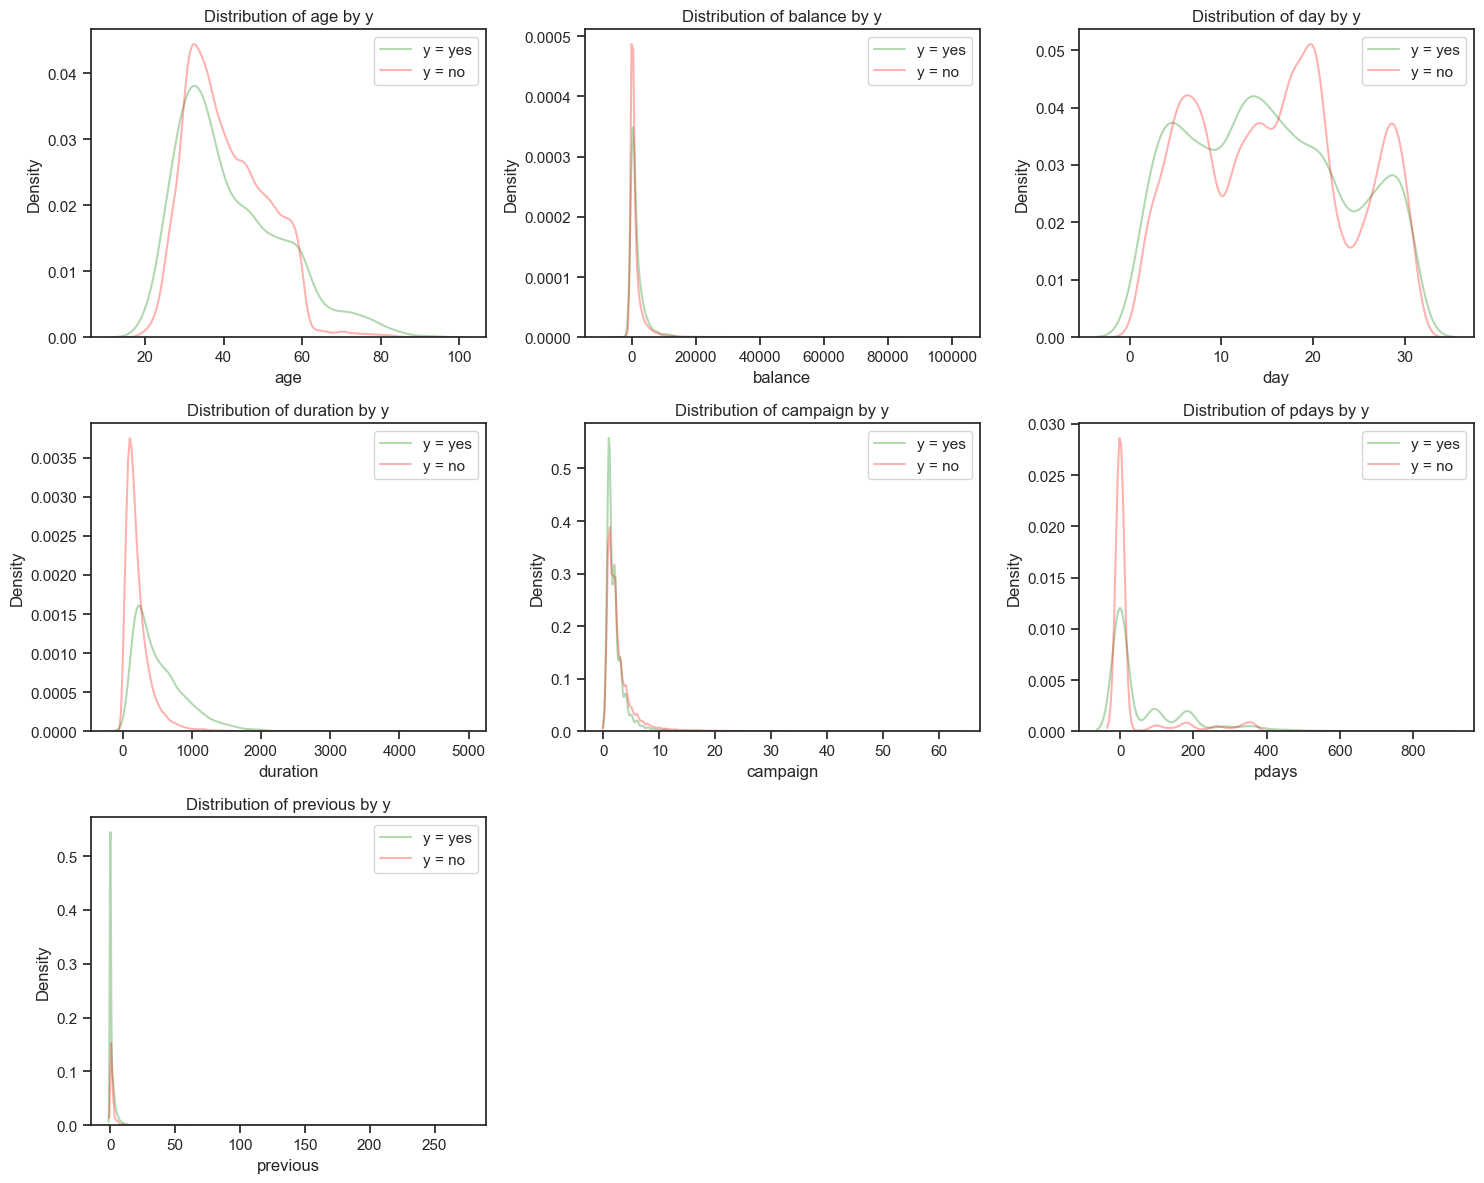

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

variables = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Create a 3x3 subplot
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

# Loop over variables
for i, var in enumerate(variables):
    ax = axes[i]
    
    df_plot = df.copy()
    
    # Plot distributions by 'y'
    sns.kdeplot(df_plot[df_plot['y'] == 'yes'][var], ax=ax, color='green', fill=False, alpha=0.3, label='y = yes')
    sns.kdeplot(df_plot[df_plot['y'] == 'no'][var], ax=ax, color='red', fill=False, alpha=0.3, label='y = no')
    
    ax.set_title(f'Distribution of {var} by y')
    ax.set_xlabel(var)
    ax.set_ylabel('Density')
    ax.legend()

# Remove unused axes if any
for j in range(len(variables), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


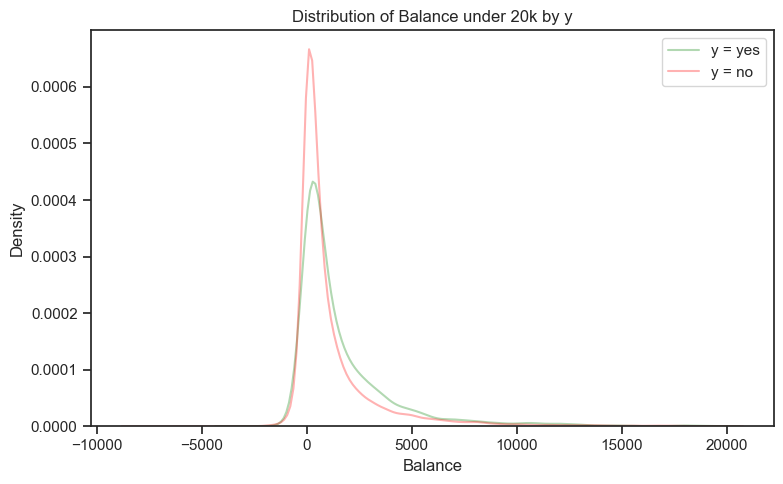

In [54]:
%matplotlib inline


# Filter full dataframe (keep balance < 20000)
df_plot = df[df['balance'] < 20000]

plt.figure(figsize=(8,5))

# Plot KDE by 'y'
sns.kdeplot(df_plot[df_plot['y'] == 'yes']['balance'], color='green', fill=False, alpha=0.3, label='y = yes')
sns.kdeplot(df_plot[df_plot['y'] == 'no']['balance'], color='red', fill=False, alpha=0.3, label='y = no')

plt.title('Distribution of Balance under 20k by y')
plt.xlabel('Balance')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()


In [69]:
upper_bound = df['balance'].quantile(0.99)

df_99 = df[df['balance']>= upper_bound]

percentages = df['y'].value_counts(normalize=True) * 100


print("Proportion in the target variable: ",percentages)

Proportion in the target variable:  y
no     88.30152
yes    11.69848
Name: proportion, dtype: float64


In [68]:
percentages_outliers = df_99['y'].value_counts(normalize=True) * 100
print("Proportion in the target variable: ",percentages_outliers)

Proportion in the target variable:  y
no     88.07947
yes    11.92053
Name: proportion, dtype: float64


In [70]:
df['balance'] = df['balance'].clip(upper=upper_bound)

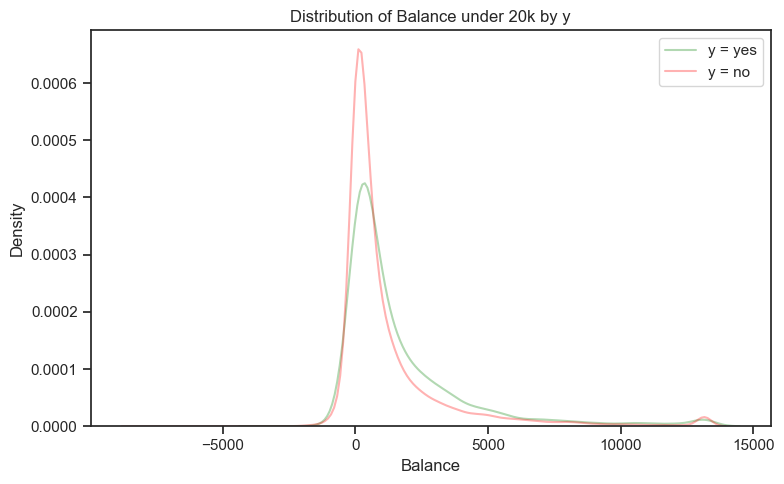

In [ ]:
%matplotlib inline


# Filter full dataframe (keep balance < 20000)
df_plot = df[df['balance'] < 20000]

plt.figure(figsize=(8,5))

# Plot KDE by 'y'
sns.kdeplot(df_plot[df_plot['y'] == 'yes']['balance'], color='green', fill=False, alpha=0.3, label='y = yes')
sns.kdeplot(df_plot[df_plot['y'] == 'no']['balance'], color='red', fill=False, alpha=0.3, label='y = no')

plt.title('Distribution of Balance by y')
plt.xlabel('Balance')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()

In [73]:
upper_bound = df['duration'].quantile(0.99)

df_99 = df[df['duration']>= upper_bound]

print(upper_bound)
percentages_outliers = df_99['y'].value_counts(normalize=True) * 100
print("Proportion in the target variable: ",percentages_outliers)

1269.0
Proportion in the target variable:  y
yes    61.453744
no     38.546256
Name: proportion, dtype: float64


In [74]:
upper_bound = df['campaign'].quantile(0.99)

df_99 = df[df['campaign']>= upper_bound]

print(upper_bound)
percentages_outliers = df_99['y'].value_counts(normalize=True) * 100
print("Proportion in the target variable: ",percentages_outliers)

16.0
Proportion in the target variable:  y
no     97.54717
yes     2.45283
Name: proportion, dtype: float64


In [75]:
upper_bound = df['pdays'].quantile(0.99)

df_99 = df[df['pdays']>= upper_bound]

print(upper_bound)
percentages_outliers = df_99['y'].value_counts(normalize=True) * 100
print("Proportion in the target variable: ",percentages_outliers)

370.0
Proportion in the target variable:  y
no     63.429752
yes    36.570248
Name: proportion, dtype: float64


In [76]:
upper_bound = df['previous'].quantile(0.99)

df_99 = df[df['previous']>= upper_bound]

print(upper_bound)
percentages_outliers = df_99['y'].value_counts(normalize=True) * 100
print("Proportion in the target variable: ",percentages_outliers)

8.900000000001455
Proportion in the target variable:  y
no     77.041943
yes    22.958057
Name: proportion, dtype: float64


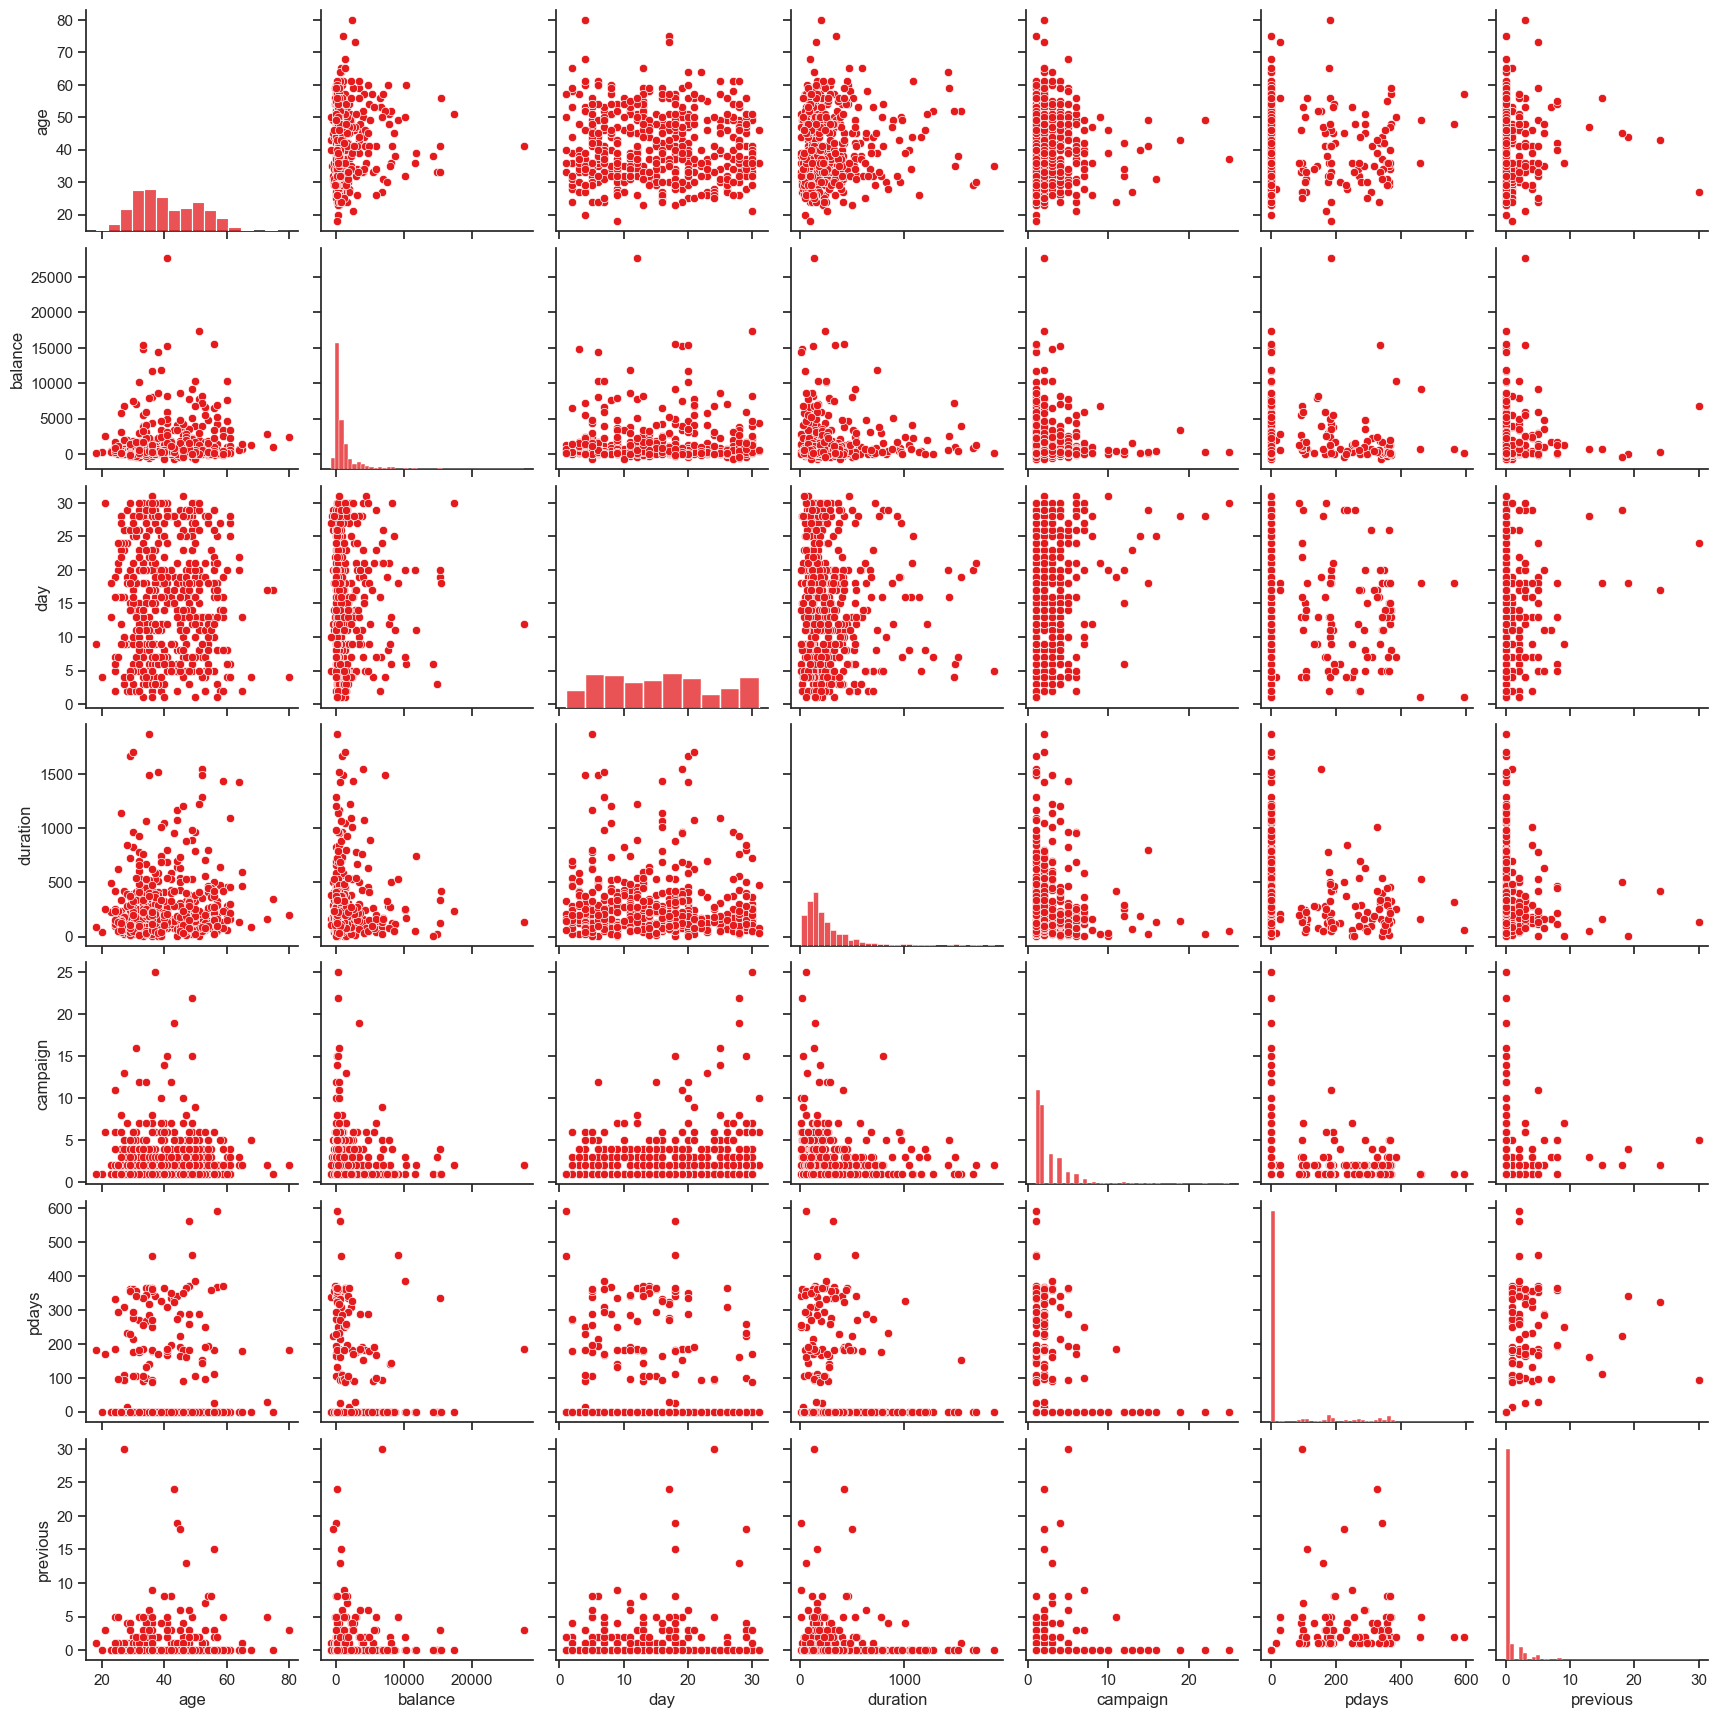

In [37]:
%matplotlib inline
sns.pairplot(data=df_sample)

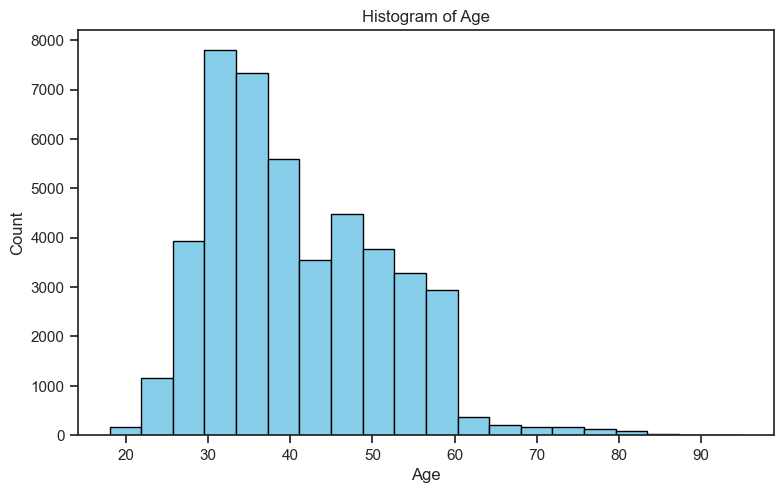

In [29]:
%matplotlib inline
plt.figure(figsize=(8,5))
plt.hist(df['age'], bins=20, color='skyblue', edgecolor='black')
plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [26]:
from autoviz.AutoViz_Class import AutoViz_Class

AV = AutoViz_Class()
df_av = AV.AutoViz(
    filename="",   # leave empty when using a DataFrame
    dfte=df, 
    depVar="y",    # target column
    header=0, 
    verbose=1
)

Shape of your Data Set loaded: (45211, 17)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  7
    Number of String-Categorical Columns =  6
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  3
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    16 Predictors classified...
        No variables removed since no ID or low-information variables found in data set

################ Binary_Classification problem #####################
To fix these data qual

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
age,int64,0.000000,0,18.000000,95.000000,Column has 487 outliers greater than upper bound (70.50) or lower than lower bound(10.50). Cap them or remove them.
job,object,0.000000,0,,,1 rare categories: ['unknown']. Group them into a single category or drop the categories.
marital,object,0.000000,0,,,No issue
education,object,0.000000,0,,,No issue
default,object,0.000000,0,,,No issue
balance,int64,0.000000,15,-8019.000000,102127.000000,Column has 4729 outliers greater than upper bound (3462.00) or lower than lower bound(-1962.00). Cap them or remove them.
housing,object,0.000000,0,,,No issue
loan,object,0.000000,0,,,No issue
contact,object,0.000000,0,,,No issue
day,int64,0.000000,0,1.000000,31.000000,No issue


Total Number of Scatter Plots = 28


KeyboardInterrupt: 

In [7]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [9]:
print(df.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


In [10]:
df["y"].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64